In [1]:
import numpy as np
np.__version__

'2.3.3'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.10.6'

In [3]:
import sklearn
from sklearn.metrics import pairwise_distances
sklearn.__version__

'1.7.2'

#### `np.nonzero`

Vamos começar gerando um array de números inteiros aleatórios onde alguns certamente vão ser iguais a 0.

Instancie um gerador de números aleatórios com `np.random.default_rng` e `seed=60`.

In [4]:
rng = np.random.default_rng(seed=60)

Agora, com `rng.integers`, obtenha 50 valores inteiros aleatórios no intervalo [0, 7). Use `reshape` para que este array seja apresentado no formato (2, 5, 5).

In [5]:
array = rng.integers(low=0, high=7, size=50).reshape(2, 5, 5)

In [6]:
array

array([[[1, 2, 2, 0, 6],
        [0, 6, 6, 6, 6],
        [6, 3, 1, 6, 6],
        [6, 0, 2, 3, 2],
        [6, 4, 4, 0, 2]],

       [[3, 3, 5, 2, 4],
        [0, 4, 2, 3, 5],
        [1, 6, 3, 5, 0],
        [5, 2, 0, 3, 2],
        [0, 1, 3, 0, 6]]])

Com `np.nonzero`, recupere os índices necessários para filtrar os valores diferentes de 0.

In [7]:
indices = np.nonzero(array)

In [8]:
indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4]),
 array([0, 1, 2, 4, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 2, 3, 4, 0, 1, 2, 4, 0,
        1, 2, 3, 4, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 3, 4, 1, 2, 4]))

👆 Como `array` tem 3 eixos, `np.nonzero` retorna uma tupla com 3 elementos: os índices no eixo 0, os índices no eixo 1 e os índices no eixo 2.

Utilize `indices` para recuperar, por indexação, os valores diferentes de 0 de `array`.

In [9]:
array[indices]

array([1, 2, 2, 6, 6, 6, 6, 6, 6, 3, 1, 6, 6, 6, 2, 3, 2, 6, 4, 4, 2, 3,
       3, 5, 2, 4, 4, 2, 3, 5, 1, 6, 3, 5, 5, 2, 3, 2, 1, 3, 6])

#### `np.where`

Com `np.where`, substitua os valores de `array` iguais a 0 por `np.nan`; para os demais valores, substitua por seu dobro.

In [10]:
array_where = np.where(array == 0, np.nan, array * 2)

In [11]:
array_where

array([[[ 2.,  4.,  4., nan, 12.],
        [nan, 12., 12., 12., 12.],
        [12.,  6.,  2., 12., 12.],
        [12., nan,  4.,  6.,  4.],
        [12.,  8.,  8., nan,  4.]],

       [[ 6.,  6., 10.,  4.,  8.],
        [nan,  8.,  4.,  6., 10.],
        [ 2., 12.,  6., 10., nan],
        [10.,  4., nan,  6.,  4.],
        [nan,  2.,  6., nan, 12.]]])

#### `np.argwhere`

Utilize `np.argwhere` para recuperar os índices dos valores de `array` que são diferentes de 0.

In [12]:
indices = np.argwhere(array != 0)

In [13]:
indices

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       [0, 0, 4],
       [0, 1, 1],
       [0, 1, 2],
       [0, 1, 3],
       [0, 1, 4],
       [0, 2, 0],
       [0, 2, 1],
       [0, 2, 2],
       [0, 2, 3],
       [0, 2, 4],
       [0, 3, 0],
       [0, 3, 2],
       [0, 3, 3],
       [0, 3, 4],
       [0, 4, 0],
       [0, 4, 1],
       [0, 4, 2],
       [0, 4, 4],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 2],
       [1, 0, 3],
       [1, 0, 4],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 3],
       [1, 1, 4],
       [1, 2, 0],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 3],
       [1, 3, 0],
       [1, 3, 1],
       [1, 3, 3],
       [1, 3, 4],
       [1, 4, 1],
       [1, 4, 2],
       [1, 4, 4]])

👆 Observe que, para esta condição (valores diferentes de 0), `np.argwhere` retorna os mesmos índices que `np.nonzero`, mas organizados de forma diferente. Enquanto que `nonzero` retorna 3 arrays, cada um representando as posições dentro de um eixo do array, `np.argwhere` retorna os próprios índices organizados como um array único.

#### `np.select`

Repita o exercício de `np.where`, mas com a função `np.select`. Neste caso, a segunda condição será `array != 0`. Como as duas condiçoes cobrem 100% das possibilidades, não há necessidade de informar um valor para o parâmetro `default`.

In [14]:
array_select = np.select(
    condlist=[array == 0, array != 0],
    choicelist=[np.nan, array * 2]
    )

In [15]:
array_select

array([[[ 2.,  4.,  4., nan, 12.],
        [nan, 12., 12., 12., 12.],
        [12.,  6.,  2., 12., 12.],
        [12., nan,  4.,  6.,  4.],
        [12.,  8.,  8., nan,  4.]],

       [[ 6.,  6., 10.,  4.,  8.],
        [nan,  8.,  4.,  6., 10.],
        [ 2., 12.,  6., 10., nan],
        [10.,  4., nan,  6.,  4.],
        [nan,  2.,  6., nan, 12.]]])

#### `np.unravel_index`

Recupere o índice correspondente ao valor de número 35 de `array`. Você pode utilizar `array.shape` para informar `shape` na chamada da função.

In [16]:
index = np.unravel_index(indices=35, shape=array.shape)

In [17]:
index

(np.int64(1), np.int64(2), np.int64(0))

#### `np.diag_indices` / `np.tril_indices` / `np.triu_indices`

Estas funções se aplicam a matrizes quadradas.

Comece gerando um array 2D de números inteiros aleatórios, amostrados no intervalo [0, 50), no formato 6x2.

In [18]:
array = rng.integers(low=0 ,high=50, size=12).reshape(6, 2)

In [19]:
array

array([[29, 45],
       [31, 49],
       [37, 47],
       [32, 23],
       [39, 28],
       [17,  3]])

Esta é uma forma bastante comum pra representar pontos em um plano cartesiano; cada linha representa um ponto, a primeira coluna é a coordenada x e a segunda é a coordenada y. No nosso exemplo, são 6 pontos.

Com o auxílio da biblioteca `matplotlib`, vamos visualizar esses pontos.

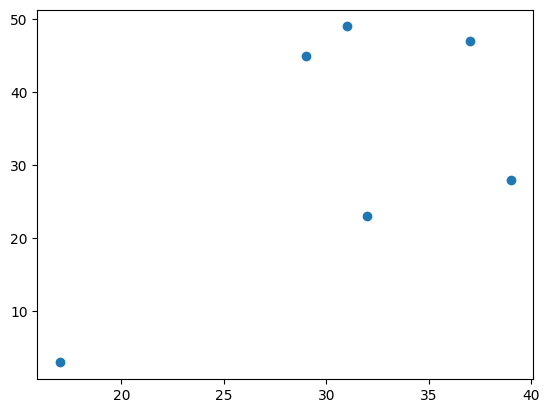

In [20]:
plt.scatter(array[:, 0], array[:, 1]);

Às vezes nós queremos calcular a distância, par a par, entre todos os pontos de um banco de dados. Para isso, vamos usar uma função da biblioteca `sklearn`.

In [21]:
dist = pairwise_distances(array, array)

In [22]:
dist

array([[ 0.        ,  4.47213595,  8.24621125, 22.20360331, 19.72308292,
        43.68065934],
       [ 4.47213595,  0.        ,  6.32455532, 26.01922366, 22.47220505,
        48.08326112],
       [ 8.24621125,  6.32455532,  0.        , 24.51530134, 19.10497317,
        48.33218389],
       [22.20360331, 26.01922366, 24.51530134,  0.        ,  8.60232527,
        25.        ],
       [19.72308292, 22.47220505, 19.10497317,  8.60232527,  0.        ,
        33.30165161],
       [43.68065934, 48.08326112, 48.33218389, 25.        , 33.30165161,
         0.        ]])

In [23]:
dist.shape

(6, 6)

Observe que a matriz de distâncias tem formato 6x6. Isso porque ela representa a distância dos 6 pontos entre si. A ordem dos pontos é a mesma do array: a primeira linha/coluna representa o primeiro ponto (primeira linha de `array`), a segunda linha/coluna representa o segundo ponto, e assim por diante.

Também observe que os valores na diagonal principal são todos iguais a 0. Isto ocorre porque esta diagonal representa a distância de cada ponto para si mesmo, que é obviamente zero.

Neste caso, como temos poucos pontos, é fácil verificar visualmente esta propriedade da matriz de distâncias. Mas suponha que você tenha uma matriz enorme, correspondente a milhares de pontos. Como pode ser feita essa verificação?

Utilize `np.diag_indices` para recuperar os índices da diagonal desta matriz.

In [24]:
indices = np.diag_indices(n=6, ndim=2)

In [25]:
indices

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

Agora, utilizando `indices`, recupere os valores de `dist` na diagonal, usando indexação.

In [26]:
values_diag = dist[indices]

In [27]:
values_diag

array([0., 0., 0., 0., 0., 0.])

Crie uma máscara booleana para verificar quais valores de `values_diag` são iguais a 0.

In [28]:
mask = values_diag == 0

In [29]:
mask

array([ True,  True,  True,  True,  True,  True])

Agora utilize o método `all` para verificar que todos os valores de `mask` são realmente iguais a `True`.

In [30]:
mask.all()

np.True_

Isto confirma que todos os valores da diagonal principal de `dist` são mesmo 0.

Vamos exibir a matriz `dist` de novo.

In [31]:
dist

array([[ 0.        ,  4.47213595,  8.24621125, 22.20360331, 19.72308292,
        43.68065934],
       [ 4.47213595,  0.        ,  6.32455532, 26.01922366, 22.47220505,
        48.08326112],
       [ 8.24621125,  6.32455532,  0.        , 24.51530134, 19.10497317,
        48.33218389],
       [22.20360331, 26.01922366, 24.51530134,  0.        ,  8.60232527,
        25.        ],
       [19.72308292, 22.47220505, 19.10497317,  8.60232527,  0.        ,
        33.30165161],
       [43.68065934, 48.08326112, 48.33218389, 25.        , 33.30165161,
         0.        ]])

Agora observe que essa matriz é espelhada. O valor no índice [1, 2]  é igual ao valor no índice [2, 1]; o valor no índice [1, 3] é igual a [3, 1]; [4, 5] é igual a [5, 4] e assim por diante. Isso acontece porque, obviamente, a distância entre os pontos 1 e 2 é igual à distância entre os pontos 2 e 1.

Por isso, para economizar memória, é comum que as matrizes de distância tenham os valores no triângulo inferior zerados, já que ela contém valores redundantes.

Utilize `np.tril_indices` para recuperar os índices do triângulo inferior da matriz `dist`.

In [32]:
indices = np.tril_indices(n=6, m=6)

In [33]:
indices

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5]))

Agora utilize `indices` como índices de indexação para mudar estes valores de `dist` para serem iguais a 0.

In [34]:
dist[indices] = 0

In [35]:
dist

array([[ 0.        ,  4.47213595,  8.24621125, 22.20360331, 19.72308292,
        43.68065934],
       [ 0.        ,  0.        ,  6.32455532, 26.01922366, 22.47220505,
        48.08326112],
       [ 0.        ,  0.        ,  0.        , 24.51530134, 19.10497317,
        48.33218389],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  8.60232527,
        25.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        33.30165161],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

Esta é uma das aplicações práticas das funções de indexação do NumPy voltadas a matrizes quadradas. Se você quiser, pode refazer o exercício, agora zerando o triângulo superior ao invés do inferior.